<a href="https://colab.research.google.com/github/swilsonmfc/trees/blob/master/Mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobility

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost  as xgb

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

# Data

In [2]:
df = pd.read_csv('https://github.com/swilsonmfc/trees/raw/master/mobile.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


# EDA

## Missing
* No missing data

In [3]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Target
* Multi-Class Problem
* Creator was generous, classes are balanced

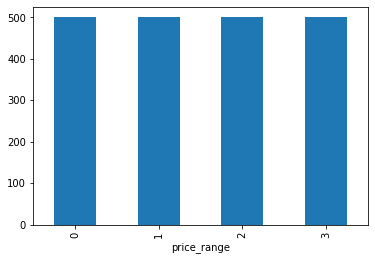

In [4]:
df.groupby('price_range').size().plot.bar();

## Battery

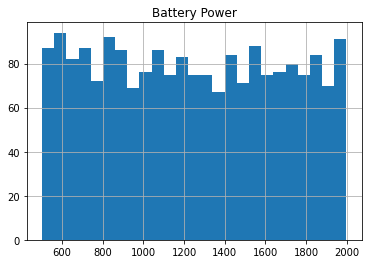

In [5]:
df.battery_power.hist(bins=25)
plt.title('Battery Power');

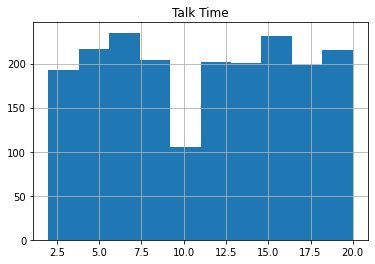

In [6]:
df.talk_time.hist(bins=10)
plt.title('Talk Time');

## Processor

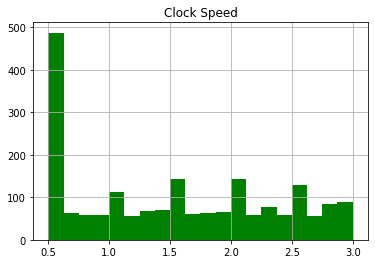

In [7]:
df.clock_speed.hist(bins=20, color='green');
plt.title('Clock Speed');

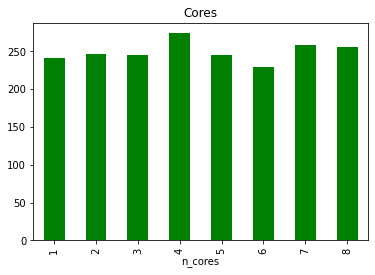

In [8]:
df.groupby('n_cores').size().plot.bar(color='green')
plt.title('Cores');

## Connectivity

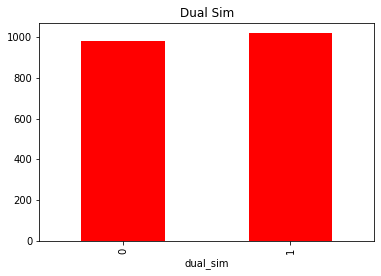

In [9]:
df.groupby('dual_sim').size().plot.bar(color='red');
plt.title('Dual Sim');

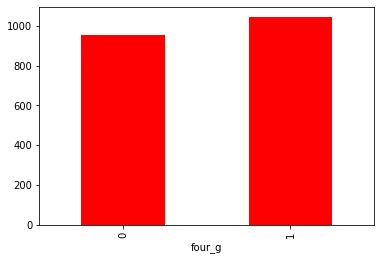

In [10]:
df.groupby('four_g').size().plot.bar(color='red')

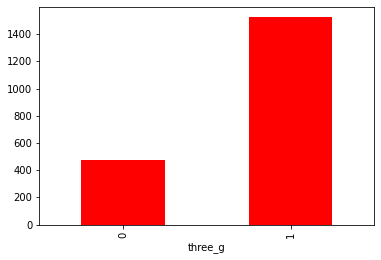

In [11]:
df.groupby('three_g').size().plot.bar(color='red')

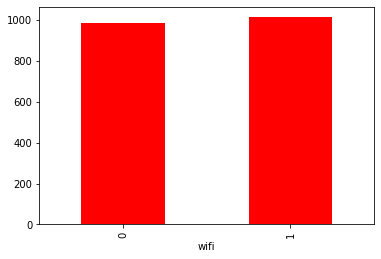

In [12]:
df.groupby('wifi').size().plot.bar(color='red')

## Memory

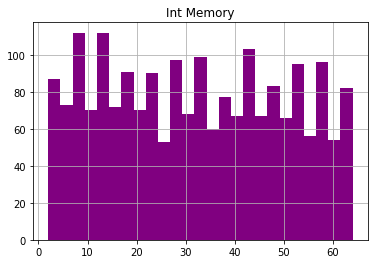

In [13]:
df.int_memory.hist(bins=25, color='purple')
plt.title('Int Memory');

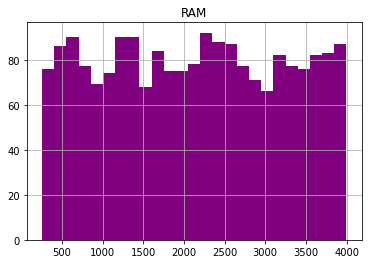

In [14]:
df.ram.hist(bins=25, color='purple')
plt.title('RAM');

## Screen

Text(0.5, 1.0, 'Touch Screen')

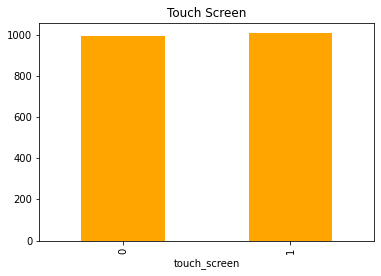

In [15]:
df.groupby('touch_screen').size().plot.bar(color='orange');
plt.title('Touch Screen')

Text(0.5, 1.0, 'Pixels Height vs Width')

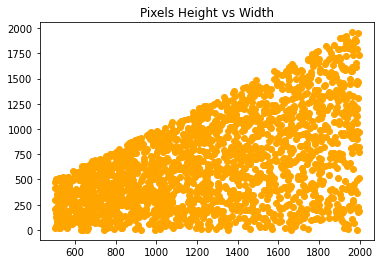

In [16]:
plt.scatter(df.px_width, df.px_height, color='orange')
plt.title('Pixels Height vs Width')

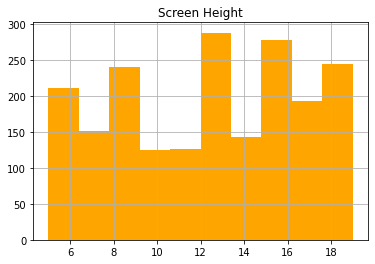

In [17]:
df.sc_h.hist(bins=10, color='orange')
plt.title('Screen Height');

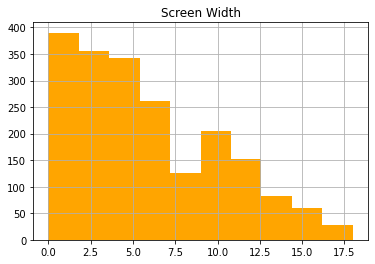

In [18]:
df.sc_w.hist(bins=10, color='orange')
plt.title('Screen Width');

## Misc

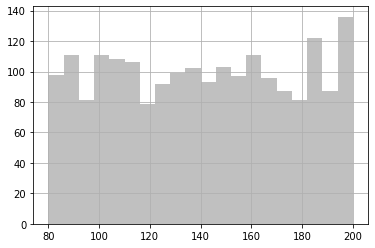

In [19]:
df.mobile_wt.hist(bins=20, color='silver')

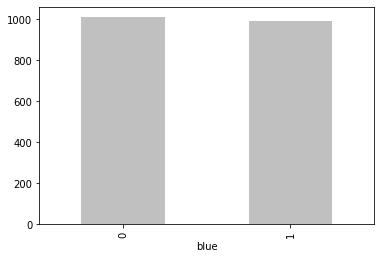

In [20]:
df.groupby('blue').size().plot.bar(color='silver')

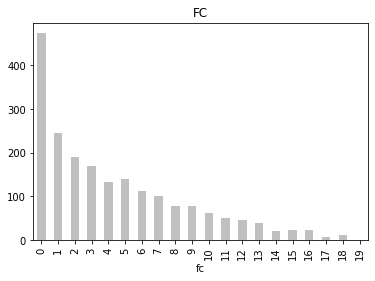

In [21]:
df.groupby('fc').size().plot.bar(color='silver')
plt.title('FC');

# Initialize

## Categorical
* Simple label encoding provided

In [22]:
CATEGORIES = ['blue', 'dual_sim', 'fc', 'four_g', 'pc', 'three_g', 'touch_screen', 'wifi']
for cat in CATEGORIES:
  df[cat] = df[cat].astype('int')

## Split

In [23]:
y = df['price_range']
y = y.astype('category')
X = df.copy().drop(columns=['price_range'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=400, random_state=1)

# Starter Model
* 500 estimators
* Use XGBoost defaults

## Fit

In [24]:
model = xgb.XGBClassifier(n_estimators=500)
results = model.fit(X_train, y_train)

## Test

In [25]:
preds = model.predict(X_test)
score = accuracy_score(y_test, preds)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        92
           1       0.84      0.90      0.87        96
           2       0.86      0.86      0.86       106
           3       0.95      0.92      0.94       106

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

